<a href="https://colab.research.google.com/github/argONNY/-Untitled3.ipynb-/blob/main/Lab3(6%2C7%2C1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Story 1 TARKINGTON.txt to Story 1 TARKINGTON (2).txt
Saving Story 7 HAWTHORNE.txt to Story 7 HAWTHORNE (2).txt
Saving Story 6 FISHER.txt to Story 6 FISHER (2).txt

=== Story_6_FISHER ===
Символов: 39100
Слов: 8731
Предложений: 421
3 самых длинных слова: ['enthusiastically', 'generalizations', 'unsophisticated']
Мин слов в предложении: 2
Макс слов в предложении: 94
Среднее слов в предложении: 20.74


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Индекс Флеша: 75.04
Индекс Ганнинга: 10.0
5 самых частых токенов: [('the', 269), ('to', 209), ('i', 206), ('and', 185), ('a', 184)]


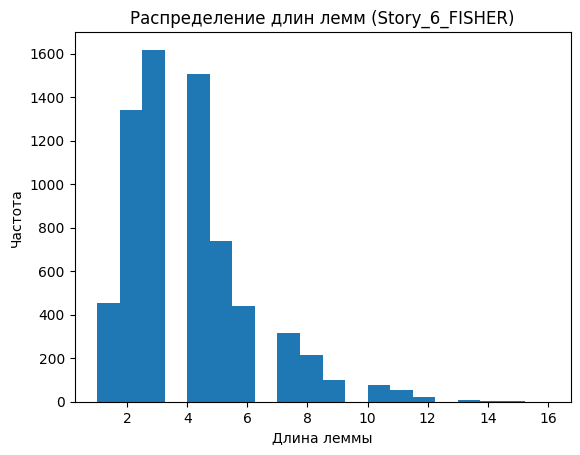

Токенов без стоп-слов: 3093


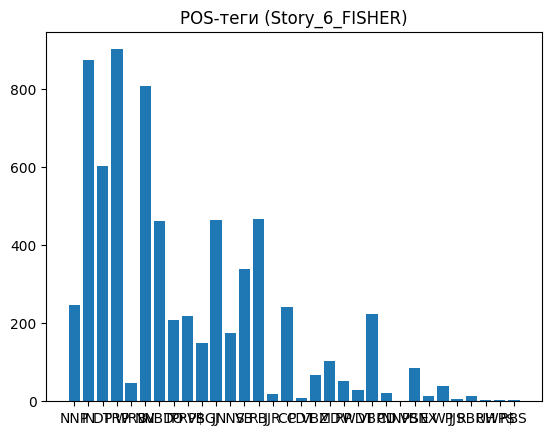


=== Story_7_HAWTHORNE ===
Символов: 43838
Слов: 9120
Предложений: 386
3 самых длинных слова: ['undistinguished', 'conventionalism', 'simultaneously']
Мин слов в предложении: 2
Макс слов в предложении: 86
Среднее слов в предложении: 23.63
Индекс Флеша: 66.26
Индекс Ганнинга: 12.0
5 самых частых токенов: [('the', 498), ('of', 285), ('and', 278), ('a', 263), ('to', 157)]


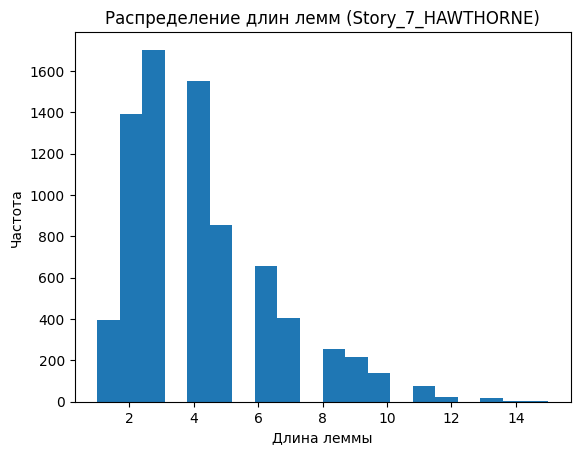

Токенов без стоп-слов: 3822


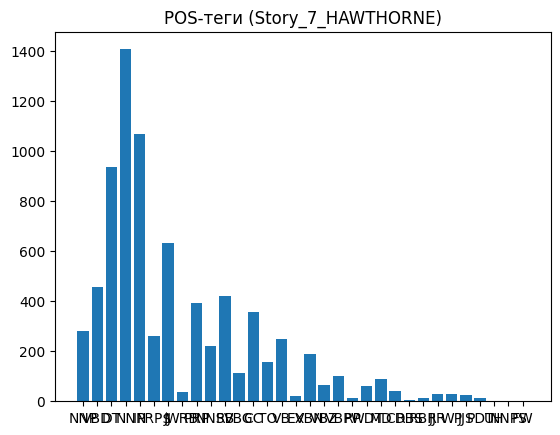


=== Story_1_TARKINGTON ===
Символов: 38682
Слов: 8765
Предложений: 481
3 самых длинных слова: ['discriminations', 'conscientiously', 'contemptuously']
Мин слов в предложении: 3
Макс слов в предложении: 80
Среднее слов в предложении: 18.22
Индекс Флеша: 75.69
Индекс Ганнинга: 9.16
5 самых частых токенов: [('the', 364), ('to', 227), ('and', 215), ('a', 149), ('of', 148)]


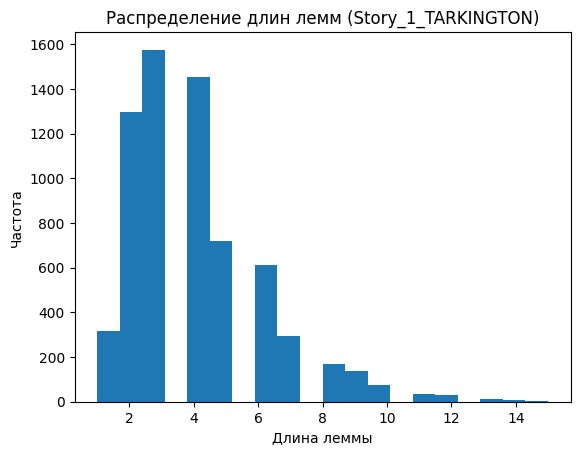

Токенов без стоп-слов: 3272


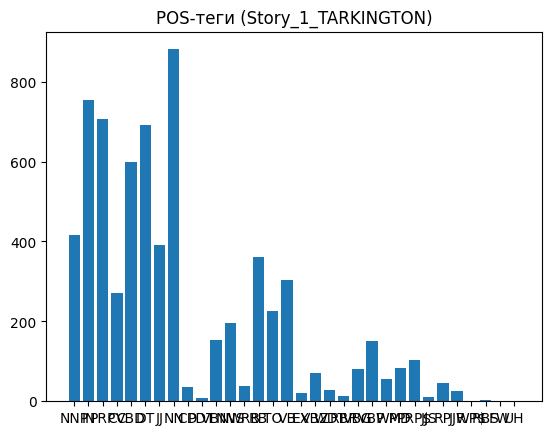


Форма TF-IDF матрицы: (3, 3665)

Косинусное сходство между текстами:
 [[1.         0.18635733 0.1970304 ]
 [0.18635733 1.         0.08733799]
 [0.1970304  0.08733799 1.        ]]
Наиболее похожие тексты: Story_6_FISHER и Story_1_TARKINGTON


In [3]:
# Лабораторная работа №3(6,7,1)
# Мояренко Артём ЗФИбд01-24
#1.Для каждого из текстов подсчитайте и выведите кол-во символов, кол-во слов и кол-во предложений в текстах. Определите и выведите на экран три самых длинных слова в текстах. Для каждого из текстов подсчитайте и выведите минимальное, максимальное и среднее кол-во слов в предложениях текста.
#2.Оцените и выведите, какой из текстов более читабелен по критерию индекса лёгкости чтения по шкале Флеша и индексу туманности Ганнинга.
#3.Для каждого из текстов выполните токенизацию и определите пять наиболее часто встречающихся токена и частоты их повторения.
#4.Для каждого из текстов выполните лемматизацию текстов и визуализируйте при помощи гистограммы распределение длин лемм в текстах.
#5.Для каждого из текстов удалите стоп-слова, знаки препинания и неалфавитные символы и определите, какое кол-во токенов было.
#6.Для каждого из текстов выполните разметку частей речи, определите и выведите кол-во токенов каждого типа. Визуализируйте кол-во токенов каждого типа в текстах в виде столбчатых диаграмм.
#7.Для каждого из текстов найдите именованные сущности, выведите и подсчитайте их кол-во для каждого типа.
#8.Для имеющихся текстов постройте векторы tf-idf и выведите форму (shape) построенной матрицы.
#9.Вычислите попарное сходство текстов при помощи косинусного расстояния и определите два наиболее похожих текста из трех.
# Это всё выполняется
from google.colab import files

uploaded = files.upload()

import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

FILES = {
    'Story_6_FISHER': '/content/Story 6 FISHER.txt',
    'Story_7_HAWTHORNE': '/content/Story 7 HAWTHORNE.txt',
    'Story_1_TARKINGTON': '/content/Story 1 TARKINGTON.txt'
}



def read_text(path):
    """Читает текст из файлов"""
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        return f.read()


def get_wordnet_pos(tag):
    """Переводим теги NLTK в формат WordNet"""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def count_syllables(word):
    """Простая оценка числа слогов"""
    vowels = "aeiouy"
    word = word.lower().strip(".:;?!")
    count = 0
    prev_vowel = False
    for char in word:
        if char in vowels:
            if not prev_vowel:
                count += 1
                prev_vowel = True
        else:
            prev_vowel = False
    if word.endswith("e"):
        count = max(1, count - 1)
    return count or 1


def flesch_index(text):
    """Индекс лёгкости чтения Флеша"""
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    words_alpha = [w for w in words if w.isalpha()]
    syllables = sum(count_syllables(w) for w in words_alpha)
    ASL = len(words_alpha) / len(sentences)
    ASW = syllables / len(words_alpha)
    return round(206.835 - 1.015 * ASL - 84.6 * ASW, 2)


def gunning_fog_index(text):
    """Индекс туманности Ганнинга"""
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    words_alpha = [w for w in words if w.isalpha()]
    complex_words = [w for w in words_alpha if count_syllables(w) >= 3]
    ASL = len(words_alpha) / len(sentences)
    PCW = 100 * len(complex_words) / len(words_alpha)
    return round(0.4 * (ASL + PCW), 2)


lemmatizer = WordNetLemmatizer()

texts = {name: read_text(path) for name, path in FILES.items()}

for name, text in texts.items():
    print(f"\n=== {name} ===")

    words = word_tokenize(text)
    sentences = sent_tokenize(text)

    print(f"Символов: {len(text)}")
    print(f"Слов: {len(words)}")
    print(f"Предложений: {len(sentences)}")

    words_alpha = [w for w in words if w.isalpha()]
    longest = sorted(words_alpha, key=len, reverse=True)[:3]
    print("3 самых длинных слова:", longest)

    words_in_sent = [len(word_tokenize(s)) for s in sentences]
    print(f"Мин слов в предложении: {min(words_in_sent)}")
    print(f"Макс слов в предложении: {max(words_in_sent)}")
    print(f"Среднее слов в предложении: {round(sum(words_in_sent) / len(words_in_sent), 2)}")

    print("Индекс Флеша:", flesch_index(text))
    print("Индекс Ганнинга:", gunning_fog_index(text))

    freq = Counter([w.lower() for w in words_alpha])
    print("5 самых частых токенов:", freq.most_common(5))

    pos_tags = nltk.pos_tag(words_alpha)
    lemmas = [lemmatizer.lemmatize(w, get_wordnet_pos(tag)) for w, tag in pos_tags]
    lengths = [len(l) for l in lemmas]

    plt.hist(lengths, bins=20)
    plt.title(f"Распределение длин лемм ({name})")
    plt.xlabel("Длина леммы")
    plt.ylabel("Частота")
    plt.show()

    stop = set(stopwords.words('english'))
    clean_tokens = [w.lower() for w in words_alpha if w.lower() not in stop]
    print("Токенов без стоп-слов:", len(clean_tokens))

    pos_counts = Counter(tag for word, tag in pos_tags)
    plt.bar(pos_counts.keys(), pos_counts.values())
    plt.title(f"POS-теги ({name})")
    plt.show()

corpus = list(texts.values())
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(corpus)
print("\nФорма TF-IDF матрицы:", tfidf.shape)

sim = cosine_similarity(tfidf)
print("\nКосинусное сходство между текстами:\n", sim)

max_sim = np.unravel_index(np.argmax(sim * (1 - np.eye(len(sim)))), sim.shape)
print(f"Наиболее похожие тексты: {list(FILES.keys())[max_sim[0]]} и {list(FILES.keys())[max_sim[1]]}")
